## Ejercicio 1: 
### Determinar de forma analítica el radio del camino circular que realiza el robot al ajustarla velocidad lineal y angular a valores constantes. Realizar el cálculo para dos velocidades cualquieras teniendo en cuenta las velocidades máximas del robot.
### Nota: Los límites de velocidad y los parámetros cinemáticos (el radio de la rueda R y la distancia entre ruedas b) de los diferentes modelos del robot TurtleBot3 se obtienen de las especificaciones (https://emanual.robotis.com/docs/en/platform/turtlebot3/features/)

![alt text]({82D18307-F634-4029-BBD9-4CEEA37C4A10}.png)


In [55]:
#size
print('size')
D=287 #mm de centro a centro de las ruedas
print('D=',D,'mm','centro a centro de las ruedas')
R=143.5 #mm centro de rueda a centro robot 
print('R=',R,'mm','centro de rueda a centro robot')
# Con los datos dados suponemos que el base_link del robot está en el centro del eje entre las ruedas móviles

#ruedas
r=33 #mm radio de la rueda
print('r=',r,'mm','radio de la rueda')
#max vel
v_max=0.26 #m/s
print('v_max=',v_max,'m/s','velocidad lineal máxima')
w_max=1.82 #rad/s
print('w_max=',w_max,'rad/s','velocidad angular máxima')

print('la velocidad angular y lineal se relacinan como v=w*R')
#velocidad angular y lineal se relacinan como v=w*R
#radio de la trayectoria circular R=v/w
#Las unidades deben ser consistentes. si v en m/s y w en rad/s R en m
print('Para las velocidades máximas del robot tenemos')
R_max=v_max/w_max
print("Radio de la trayectoria circular: %.2f m" % R_max)




size
D= 287 mm centro a centro de las ruedas
R= 143.5 mm centro de rueda a centro robot
r= 33 mm radio de la rueda
v_max= 0.26 m/s velocidad lineal máxima
w_max= 1.82 rad/s velocidad angular máxima
la velocidad angular y lineal se relacinan como v=w*R
Para las velocidades máximas del robot tenemos
Radio de la trayectoria circular: 0.14 m


## Ejercicio 2
### Calcular la velocidad lineal y angular para que el robot realice un camino circular con radio de 1 m.

In [56]:
# consideramos ahora R=1 m
R=1 #m
#manteniendo la velocidad lineal máxima
w=v_max/R
print('Para un radio de trayectoria circular R=1m y manteniendo la velocidad lineal máxima, w= ',w,'m/s')
print('w < w_max, OK  ')


Para un radio de trayectoria circular R=1m y manteniendo la velocidad lineal máxima, w=  0.26 m/s
w < w_max, OK  


## Ejercicio 3
### Calcular las velocidades lineales y angulares de las ruedas (izquierda y derecha) del robot para el camino circular del punto anterior.

In [66]:
#queremos calcular las velocidades de las ruedas para el caso anterior.
v=v_max #m/s
w=w
print('v= ',v,'m/s')
print('w= ',w,'rad/s') 

#siguiendo la cinemática de un robot diferencial
# si el robot se mueve en un circulo con un radio R, la rueda interior (su centro) se mueve a lo largo de un circulo con radio R-D/2
# y la rueda exterior (su centro) con radio R+D/2
R_int=R-D/2000 #m
R_ext=R+D/2000 #m
#Para calcular la velocidad lineal del centro de cada rueda entonces hacemos:
#v_ri=w*R_int
print('se asume que una v_ang(w) positiva indica rotación en sentido antihorario')
print('Radio de la trayectoria del robot R= ',R,'m')
print('distnacia entre ruedas D= ',D/1000,'m')
print('Radio de la trayectoria de la rueda interna R_int= ',R_int,'m')
print('Radio de la trayectoria de la rueda externa R_ext= ',R_ext,'m')
v_ri=w*R_int #m/s
v_re=w*R_ext #m/s
print('velocidad lineal rueda interna: v_ri= %.2f m/s' % v_ri)
print('velocidad lineal rueda externa: v_re=  %.2f m/s' % v_re)

# Para calcular ahora sus velocidades angulares respectivas se utiliza el radio de cada rueda w=v/r
print('radio de las ruedas r=',r/1000,'m')
w_ri=v_ri/(r/1000) #rad/s
w_re=v_re/(r/1000) #rad/s
print('velocidad angular rueda interna: w_ri= %.2f rad/s' % w_ri)
print('velocidad angular rueda externa: w_re= %.2f rad/s' % w_re)

v=  0.26 m/s
w=  0.26 rad/s
se asume que una v_ang(w) positiva indica rotación en sentido antihorario
Radio de la trayectoria del robot R=  1 m
distnacia entre ruedas D=  0.287 m
Radio de la trayectoria de la rueda interna R_int=  0.8565 m
Radio de la trayectoria de la rueda externa R_ext=  1.1435 m
velocidad lineal rueda interna: v_ri= 0.22 m/s
velocidad lineal rueda externa: v_re=  0.30 m/s
radio de las ruedas r= 0.033 m
velocidad angular rueda interna: w_ri= 6.75 rad/s
velocidad angular rueda externa: w_re= 9.01 rad/s


## Ejercicio 4 y 5
### Generar un registro (log) de odometría y velocidad del robot, para lo cual hay que ejecutar nuevamente la simulación y utilizar el script dump odom.py. Este script muestra en pantalla 6 columnas con los siguientes datos: tiempo (timestamp), coordenadas x, y, orientación, velocidad lineal y angular. El registro de datos debe ser realizado con el robot en movimiento utilizando teleoperación por teclado.

### Escribir un script en Python que cargue los datos del archivo log y genere gráficos de:
* a) el camino seguido por el robot,
* b) la trayectoria (pose respecto al tiempo), y
* c) la velocidad del robot respecto al tiempo.

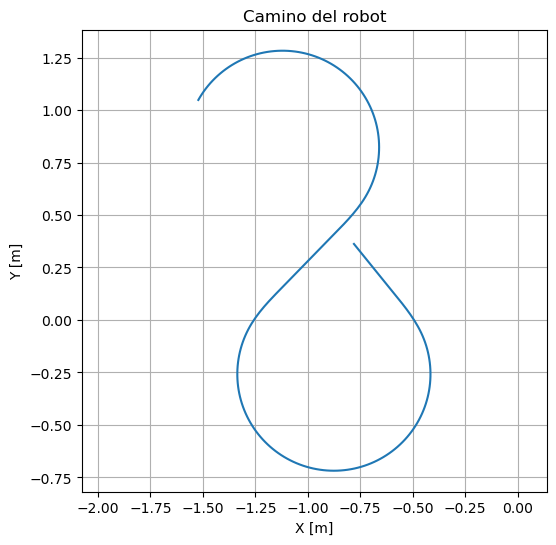

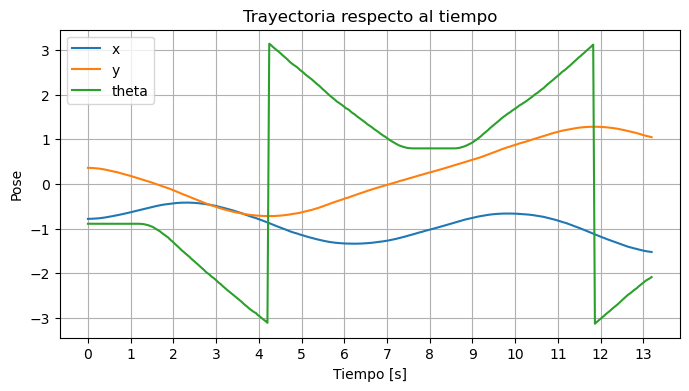

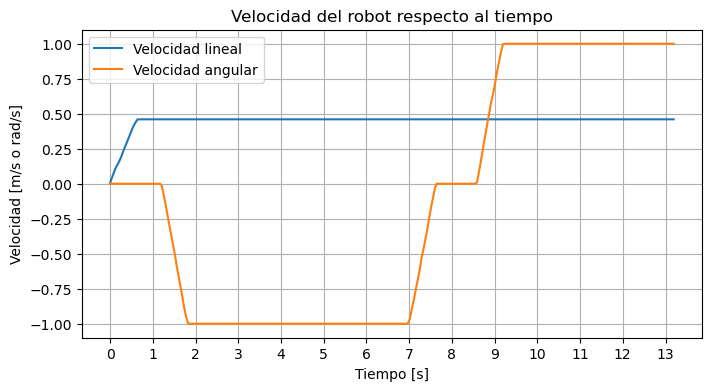

In [1]:
import pandas as pd #Manejo de datos
import numpy as np #Manejo de matrices y vectores
import matplotlib.pyplot as plt #Biblioteca de gráficos
import matplotlib.ticker as ticker #Para manejar los ejes de los gráficos


%matplotlib inline

#ATENCION SE DEBE CAMBIAR LA RUTA DEL ARCHIVO A LA RUTA DONDE ESTE GUARDADO EL odom_log.txt

file_path = '/mnt/c/Users/sachi/Facultad/3 - DOCTORADO/Materias/Robotica Móvil/TP 2/odom_ej5.txt' # Cambiar por la ruta correcta
cols = ['timestamp', 'x', 'y', 'theta', 'v_lin', 'v_ang']

# Leer archivo
df = pd.read_csv(file_path, sep='\t', names=cols, header=None)

# Filtrar filas con velocidad lineal y angular cero
df = df[(df['v_lin'] != 0) | (df['v_ang'] != 0)]

import re

# Función para convertir string a float segundos
def parse_timestamp(s):
    m = re.search(r'sec=(\d+), nanosec=(\d+)', s)
    if m:
        sec = int(m.group(1))
        nsec = int(m.group(2))
        return sec + nsec*1e-9
    else:
        return None

df['time_s'] = df['timestamp'].apply(parse_timestamp)
#convierto tiempo absoluto a tiempo relativo
df['time_s'] = df['time_s'] - df['time_s'].iloc[0]

#Gráfico a) Camino seguido por el robot
plt.figure(figsize=(6,6))
plt.plot(df['x'], df['y'], linestyle='-')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.title('Camino del robot')
plt.axis('equal')
plt.grid(True)
plt.show()

#Gráfico b) Trayectoria respecto al tiempo

plt.figure(figsize=(8,4))
plt.plot(df['time_s'], df['x'], label='x', linestyle='-')
plt.plot(df['time_s'], df['y'], label='y', linestyle='-')
plt.plot(df['time_s'], df['theta'], label='theta', linestyle='-')
plt.xlabel('Tiempo [s]')
plt.ylabel('Pose')
plt.title('Trayectoria respecto al tiempo')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(15))
plt.show()


#Gráfico c) Velocidades respecto al tiempo

plt.figure(figsize=(8,4))
plt.plot(df['time_s'], df['v_lin'], label='Velocidad lineal')
plt.plot(df['time_s'], df['v_ang'], label='Velocidad angular')
plt.xlabel('Tiempo [s]')
plt.ylabel('Velocidad [m/s o rad/s]')
plt.title('Velocidad del robot respecto al tiempo')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(15))
plt.show()


## Ejercicio 6
### (Opcional) Obtener otro registro de datos para un camino circular del robot y graficar el camino y la trayectoria.

## Ejercicio 7
### (opcional) Marcar tres puntos cualquiera en el gráfico del camino del robot y sus correspondientes
### puntos en la trayectoria. No elegir los puntos de inicio y final del camino.

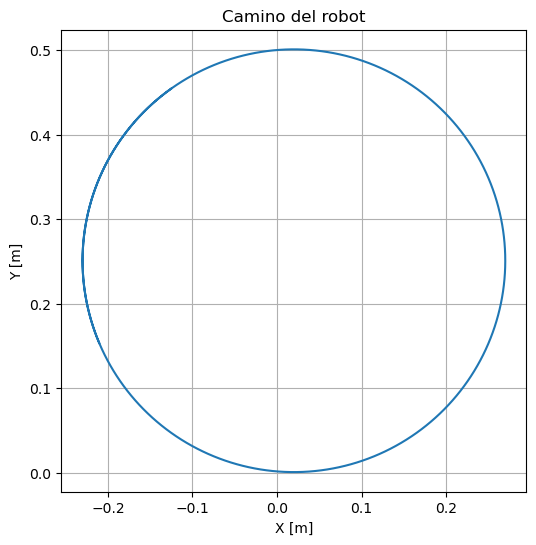

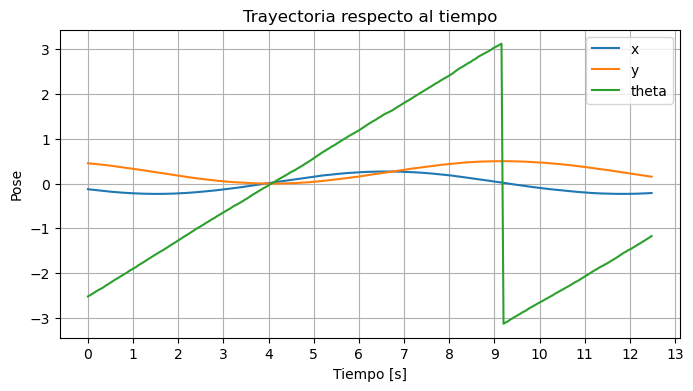

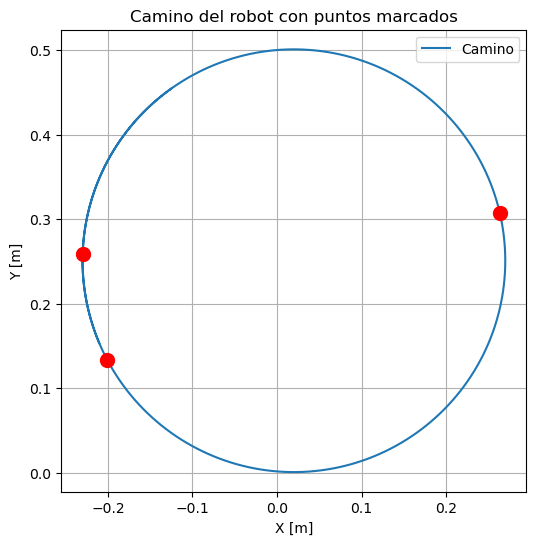

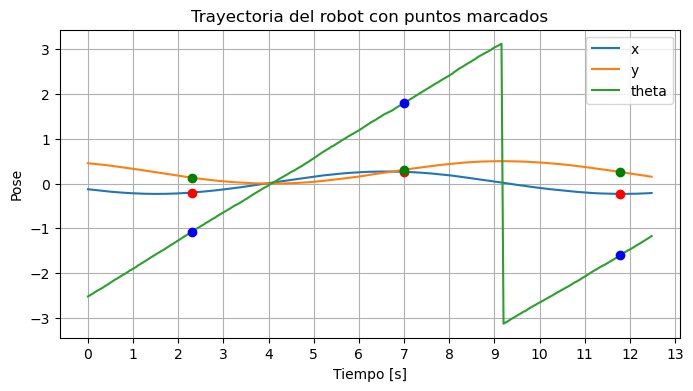

Valores elegidos (timepo, x, y, orientación)


,time_s,x,y,theta
50,2.293972,-0.200563,0.133176,-1.080343
150,6.997440,0.263448,0.307649,1.799657
250,11.777894,-0.229899,0.259114,-1.603529


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


%matplotlib inline

file_path = '/mnt/c/Users/sachi/Facultad/3 - DOCTORADO/Materias/Robotica Móvil/TP 2/odom_ej7.txt'
cols = ['timestamp', 'x', 'y', 'theta', 'v_lin', 'v_ang']

# Leer archivo
dc = pd.read_csv(file_path, sep='\t', names=cols, header=None)



# Filtrar filas con velocidad lineal y angular cero
dc = dc[(dc['v_lin'] != 0) | (dc['v_ang'] != 0)]

import re

# Función para convertir string a float segundos
def parse_timestamp(s):
    m = re.search(r'sec=(\d+), nanosec=(\d+)', s)
    if m:
        sec = int(m.group(1))
        nsec = int(m.group(2))
        return sec + nsec*1e-9
    else:
        return None

dc['time_s'] = dc['timestamp'].apply(parse_timestamp)
#convierto tiempo absoluto a tiempo relativo
dc['time_s'] = dc['time_s'] - dc['time_s'].iloc[0]

#Gráfico a) Camino seguido por el robot
plt.figure(figsize=(6,6))
plt.plot(dc['x'], dc['y'], linestyle='-')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.title('Camino del robot')
plt.axis('equal')
plt.grid(True)
plt.show()

#Gráfico b) Trayectoria respecto al tiempo

plt.figure(figsize=(8,4))
plt.plot(dc['time_s'], dc['x'], label='x', linestyle='-')
plt.plot(dc['time_s'], dc['y'], label='y', linestyle='-')
plt.plot(dc['time_s'], dc['theta'], label='theta', linestyle='-')
plt.xlabel('Tiempo [s]')
plt.ylabel('Pose')
plt.title('Trayectoria respecto al tiempo')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(15))
plt.show()

n = len(dc)
# Elijo indices para marcar los puntos
indices = [i for i in [50,150,250] if 0 < i < n]

plt.figure(figsize=(6,6))
plt.plot(dc['x'], dc['y'], linestyle='-', label='Camino')

for idx in indices:
    plt.plot(dc['x'].iloc[idx], dc['y'].iloc[idx], 'ro', markersize=10)

plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.title('Camino del robot con puntos marcados')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()


plt.figure(figsize=(8,4))
plt.plot(dc['time_s'], dc['x'], label='x', linestyle='-')
plt.plot(dc['time_s'], dc['y'], label='y', linestyle='-')
plt.plot(dc['time_s'], dc['theta'], label='theta', linestyle='-')

for idx in indices:
    plt.plot(dc['time_s'].iloc[idx], dc['x'].iloc[idx], 'ro')
    plt.plot(dc['time_s'].iloc[idx], dc['y'].iloc[idx], 'go')
    plt.plot(dc['time_s'].iloc[idx], dc['theta'].iloc[idx], 'bo')

plt.xlabel('Tiempo [s]')
plt.ylabel('Pose')
plt.title('Trayectoria del robot con puntos marcados')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(15))
plt.show()

#se muestran los valores elegidos
print('Valores elegidos (timepo, x, y, orientación)')
dc.iloc[indices][['time_s', 'x', 'y', 'theta']]

### a) ¿Cuáles son los rangos de valores de las coordenadas x e y y por qué?
### b) ¿Cuál es el rango de valores de la orientación del robot y por qué?

In [68]:
print(' El rango de x en los puntos marcados va de -0.229 hasta 0.263')
print(' El rango de y en los puntos marcados va de 0.133 hasta 0.307')
print(' El valor numérico de estos puntos dependera de la posición inicial, sin emabrgo, debido a su trayectoria circular la variación entre los extremos debería estar acotada por el diametro del circulo')
print('Utilizando la velociad lineal de 0.2 m/s y la angular de 0.8 rad/s del camino dibujado, el radio de la trayectoria es de 0.25 m y el diametro de 0.5 m')

rango_a=dc['x'][150]-dc['x'][250]
rango_b=dc['y'][150]-dc['y'][50]
rango_c=dc['theta'][150]-dc['theta'][50]

print('ambos rangos', rango_a,'y', rango_b , 'son menores que 0.5')
print('rango en theta', rango_c), 'es menor que 6.28 (2*pi)'

print('se puede ver de los puntos marcados en la trayectoria que el rango de x está muy cerca del valor del diámetro del circulo')

 El rango de x en los puntos marcados va de -0.229 hasta 0.263
 El rango de y en los puntos marcados va de 0.133 hasta 0.307
 El valor numérico de estos puntos dependera de la posición inicial, sin emabrgo, debido a su trayectoria circular la variación entre los extremos debería estar acotada por el diametro del circulo
Utilizando la velociad lineal de 0.2 m/s y la angular de 0.8 rad/s del camino dibujado, el radio de la trayectoria es de 0.25 m y el diametro de 0.5 m
ambos rangos 0.4933474760694958 y 0.174473364389466 son menores que 0.5
rango en theta 2.88000000001249
se puede ver de los puntos marcados en la trayectoria que el rango de x está muy cerca del valor del diámetro del circulo


### c) Obtener diferentes registros y gráficos para caminos circulares con diferentes valores (positivos y negativos) de velocidades lineales y angulares (utilizar todas las combinaciones de signos posibles). Indicar en los gráficos el sentido de avance del robot.

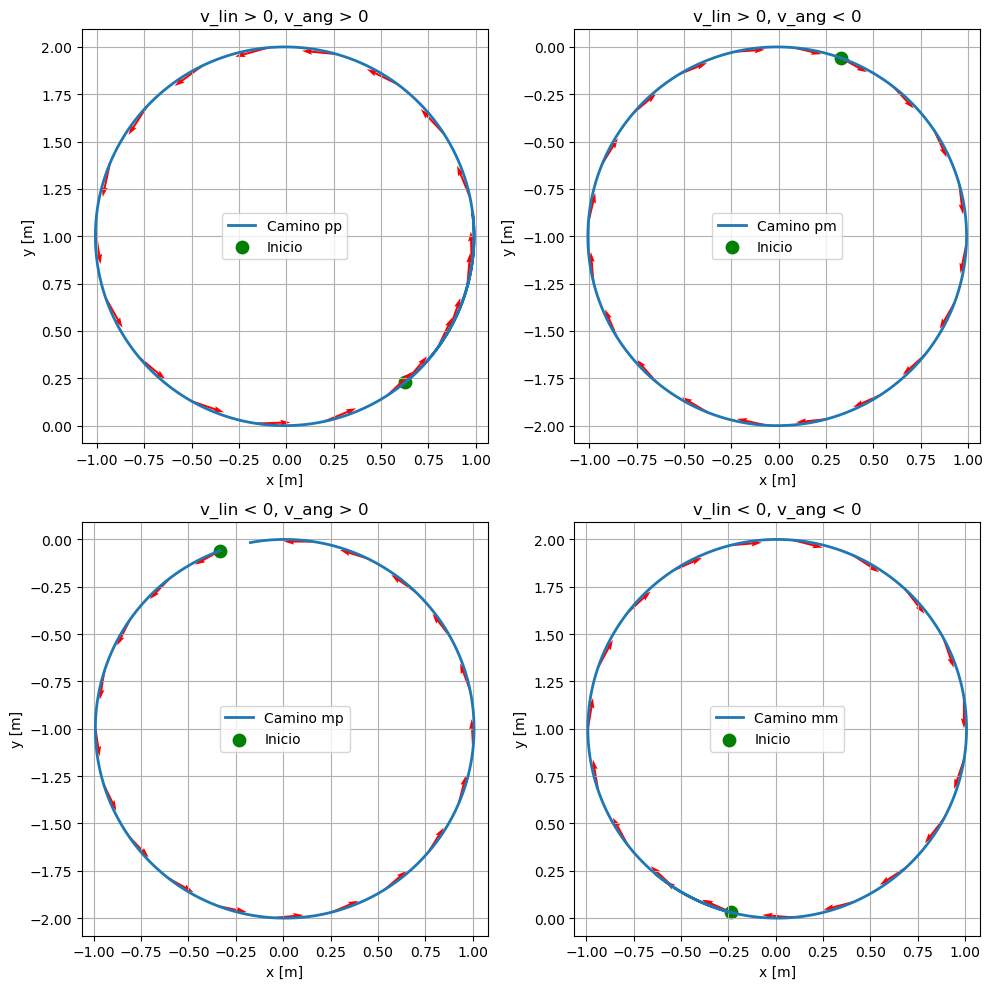

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


%matplotlib inline

pathpp = '/mnt/c/Users/sachi/Facultad/3 - DOCTORADO/Materias/Robotica Móvil/TP 2/circpp.txt'
pathmm = '/mnt/c/Users/sachi/Facultad/3 - DOCTORADO/Materias/Robotica Móvil/TP 2/circmm.txt'
pathpm = '/mnt/c/Users/sachi/Facultad/3 - DOCTORADO/Materias/Robotica Móvil/TP 2/circpm.txt'
pathmp = '/mnt/c/Users/sachi/Facultad/3 - DOCTORADO/Materias/Robotica Móvil/TP 2/circmp.txt'
cols = ['timestamp', 'x', 'y', 'theta', 'v_lin', 'v_ang']

# Leer archivos 
pp = pd.read_csv(pathpp, sep='\t', names=cols, header=None)
mm = pd.read_csv(pathmm, sep='\t', names=cols, header=None)
pm = pd.read_csv(pathpm, sep='\t', names=cols, header=None)
mp = pd.read_csv(pathmp, sep='\t', names=cols, header=None)




# Filtrar filas con velocidad lineal y angular cero para los 4 casos
pp = pp[(pp['v_lin'] != 0) | (pp['v_ang'] != 0)]
mm = mm[(mm['v_lin'] != 0) | (mm['v_ang'] != 0)]
pm = pm[(pm['v_lin'] != 0) | (pm['v_ang'] != 0)]
mp = mp[(mp['v_lin'] != 0) | (mp['v_ang'] != 0)]

import re

# Función para convertir string a float segundos
def parse_timestamp(s):
    m = re.search(r'sec=(\d+), nanosec=(\d+)', s)
    if m:
        sec = int(m.group(1))
        nsec = int(m.group(2))
        return sec + nsec*1e-9
    else:
        return None

#aplico funcion al timestamp y convierto a tiempo relativo los 4 casos
pp['time_s'] = pp['timestamp'].apply(parse_timestamp)
pp['time_s'] = pp['time_s'] - pp['time_s'].iloc[0]

mm['time_s'] = mm['timestamp'].apply(parse_timestamp)
mm['time_s'] = mm['time_s'] - mm['time_s'].iloc[0]

pm['time_s'] = pm['timestamp'].apply(parse_timestamp)
pm['time_s'] = pm['time_s'] - pm['time_s'].iloc[0]

mp['time_s'] = mp['timestamp'].apply(parse_timestamp)
mp['time_s'] = mp['time_s'] - mp['time_s'].iloc[0]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Para facilidad, hacemos una lista con los casos
casos = [
    ('pp', pp, 'v_lin > 0, v_ang > 0'),
    ('pm', pm, 'v_lin > 0, v_ang < 0'),
    ('mp', mp, 'v_lin < 0, v_ang > 0'),
    ('mm', mm, 'v_lin < 0, v_ang < 0')
]


#Grafico los 4 casos iterando para usar un solo bloque de comandos
for ax, (nombre, df, titulo) in zip(axes.flat, casos):
    ax.plot(df['x'], df['y'], label=f'Camino {nombre}', linewidth=2)

    ax.scatter(df['x'].iloc[0], df['y'].iloc[0], color='green', s=80, marker='o', label='Inicio')

    paso = max(len(df)//20, 1)   
    x = df['x'].iloc[::paso]
    y = df['y'].iloc[::paso]
    dx = np.diff(df['x'].iloc[::paso], append=df['x'].iloc[-1])
    dy = np.diff(df['y'].iloc[::paso], append=df['y'].iloc[-1])

    # Dibuja flechas pequeñas indicando el sentido de avance
    ax.quiver(x, y, dx, dy, angles='xy', scale_units='xy', scale=2, color='r', width=0.005)

    ax.set_title(titulo, fontsize=12)
    ax.set_xlabel('x [m]')
    ax.set_ylabel('y [m]')
    ax.axis('equal')          # Mantiene la escala igual en ambos ejes
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()


### d) Describir cuál sería la secuencia de comandos de velocidad a aplicar al robot para seguir uno de los caminos mostrados en la Figura 2 (elegir solo uno). (Camino 2 seleccionado - cuadrado de lado 2m con esquinas redondeadas de r 0.4m)

In [ ]:
#Se debe tener corriendo la simulación del tp2. Luego se puede ejectuar el siguiente bloque de codigo para dibujar la figura.
#En este caso el bloque de codigo python se ejecuta sobre la terminal de linux gracias a la fución subprocess.

import subprocess
import time
from math import pi

# Mensajes en el formato del tópico
tramo_recto = '{linear: {x: 0.2}, angular: {z: 0.0}}'     # 0.2 m/s
esquina_curvada = '{linear: {x: 0.104}, angular: {z: 0.26}}' # v=w*r  radio = 0.4 m 
frenar = '{linear: {x: 0.0}, angular: {z: 0.0}}'

# tiempos para obtener las distancias requeridas
duracion_recto = 5.7    # el tiempo se ajusto empiricamente con el simulador. el tiempo teórico es 6s -> 0.2 m/s * 6 s = 1.2 m
duracion_esquina = 6.5  # el tiempo se ajusto empiricamente con el simualdor. el tiempo teórico es t= (pi/2) / 0.26 = 6.041 s
duracion_freno = 2      # freno de 2 segundos
freq = '20'             # Hz (para -r)

#Secuencia de dibujo con frenos intermedios para mayor control
secuencia = [
    (tramo_recto, duracion_recto),
    (frenar, duracion_freno),
    (esquina_curvada, duracion_esquina),
    (frenar, duracion_freno),
    (tramo_recto, duracion_recto),
    (frenar, duracion_freno),
    (esquina_curvada, duracion_esquina),
    (frenar, duracion_freno),
    (tramo_recto, duracion_recto),
    (frenar, duracion_freno),
    (esquina_curvada, duracion_esquina),
    (frenar, duracion_freno),
    (tramo_recto, duracion_recto),
    (frenar, duracion_freno),
    (esquina_curvada, duracion_esquina),
    (frenar, duracion_freno),
]

# Loop de dibujo de secuencia con stop intermedio para aumentar control sobre el giro
for msg, dur in secuencia:
    print(f"Ejecutando: {msg} durante {dur:.2f} s")

    # inicia publicación continua a freq Hz
    p = subprocess.Popen([
        'ros2', 'topic', 'pub', '/cmd_vel',
        'geometry_msgs/msg/Twist', msg,
        '-r', freq
    ])

    # deja que publique durante el tiempo indicado
    time.sleep(dur)

    # detiene la publicación
    p.terminate()




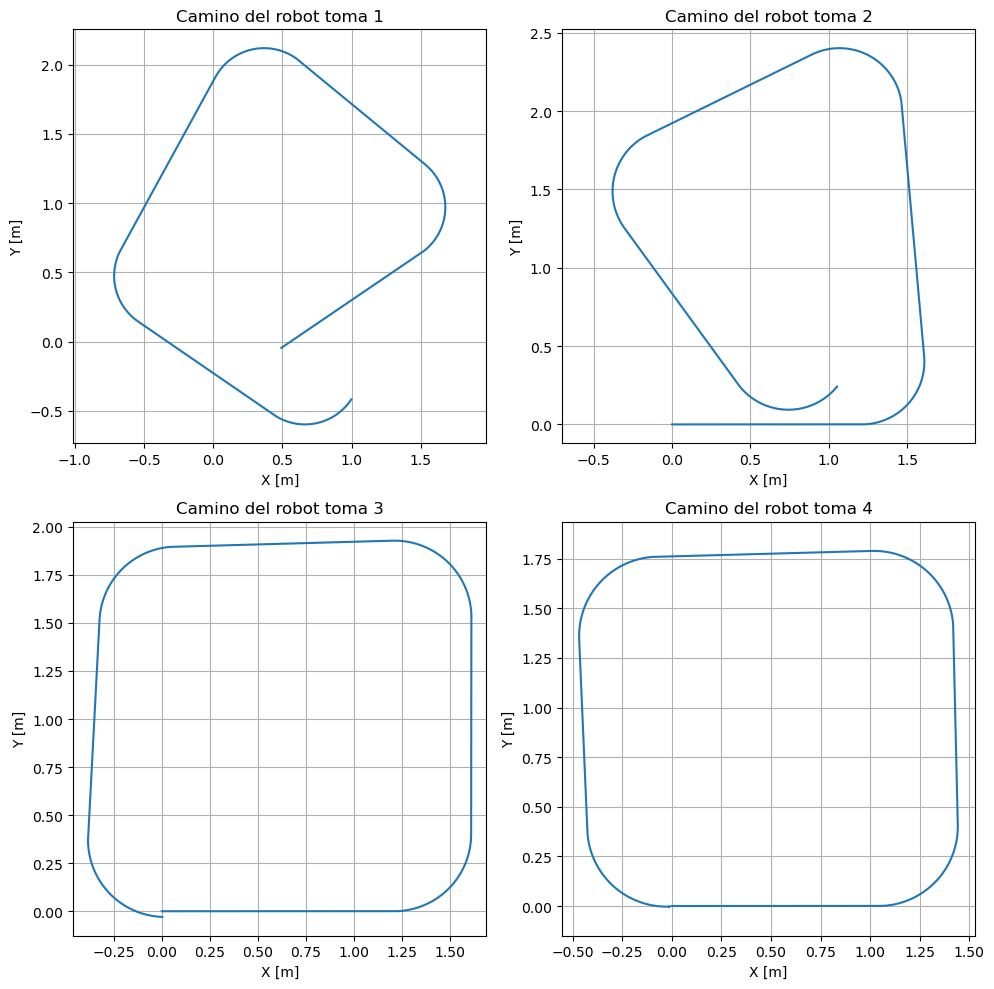

In [ ]:
#recupero trayectoria realizada y la grafico
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


%matplotlib inline

#ATENCION SE DEBE CAMBIAR LA RUTA DEL ARCHIVO A LA RUTA DONDE ESTEN GUARDADAS LAS TRAYECTORIAS
camino1_path = '/mnt/c/Users/sachi/Facultad/3 - DOCTORADO/Materias/Robotica Móvil/TP 2/camino1.txt'
camino2_path = '/mnt/c/Users/sachi/Facultad/3 - DOCTORADO/Materias/Robotica Móvil/TP 2/camino2.txt'
camino3_path = '/mnt/c/Users/sachi/Facultad/3 - DOCTORADO/Materias/Robotica Móvil/TP 2/camino3.txt'
camino4_path = '/mnt/c/Users/sachi/Facultad/3 - DOCTORADO/Materias/Robotica Móvil/TP 2/camino4.txt'
cols = ['timestamp', 'x', 'y', 'theta', 'v_lin', 'v_ang']

# Leer archivo
c1 = pd.read_csv(camino1_path, sep='\t', names=cols, header=None)
c2 = pd.read_csv(camino2_path, sep='\t', names=cols, header=None)
c3 = pd.read_csv(camino3_path, sep='\t', names=cols, header=None)
c4 = pd.read_csv(camino4_path, sep='\t', names=cols, header=None)

# Filtrar filas con velocidad lineal y angular cero
c1 = c1[(c1['v_lin'] != 0) | (c1['v_ang'] != 0)]
c2 = c2[(c2['v_lin'] != 0) | (c2['v_ang'] != 0)]
c3 = c3[(c3['v_lin'] != 0) | (c3['v_ang'] != 0)]
c4 = c4[(c4['v_lin'] != 0) | (c4['v_ang'] != 0)]
import re

# Función para convertir string a float segundos
def parse_timestamp(s):
    m = re.search(r'sec=(\d+), nanosec=(\d+)', s)
    if m:
        sec = int(m.group(1))
        nsec = int(m.group(2))
        return sec + nsec*1e-9
    else:
        return None

c1['time_s'] = c1['timestamp'].apply(parse_timestamp)
c2['time_s'] = c2['timestamp'].apply(parse_timestamp)
c3['time_s'] = c3['timestamp'].apply(parse_timestamp)
c4['time_s'] = c4['timestamp'].apply(parse_timestamp)
#convierto tiempo absoluto a tiempo relativo
c1['time_s'] = c1['time_s'] - c1['time_s'].iloc[0]
c2['time_s'] = c2['time_s'] - c2['time_s'].iloc[0]
c3['time_s'] = c3['time_s'] - c3['time_s'].iloc[0]
c4['time_s'] = c4['time_s'] - c4['time_s'].iloc[0]

#Gráfico Camino seguido por el robot
plt.figure(figsize=(10, 10))  # ancho x alto en pulgadas

plt.subplot(2, 2, 1)
plt.plot(c1['x'], c1['y'], linestyle='-')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.title('Camino del robot toma 1')
plt.axis('equal')
plt.grid(True)


plt.subplot(2, 2, 2)
plt.plot(c2['x'], c2['y'], linestyle='-')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.title('Camino del robot toma 2')
plt.axis('equal')
plt.grid(True)


plt.subplot(2, 2, 3)
plt.plot(c3['x'], c3['y'], linestyle='-')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.title('Camino del robot toma 3')
plt.axis('equal')
plt.grid(True)


plt.subplot(2, 2, 4)
plt.plot(c4['x'], c4['y'], linestyle='-')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.title('Camino del robot toma 4')
plt.axis('equal')
plt.grid(True)


plt.tight_layout()
plt.show()
